In this workbook we want to incooperate some SQL - Functions

We do the same cleaning like Workbook 02

In [1]:
#Importing the necessary libraries
import pandas as pd             # pandas for data frame
import numpy as np              # numpy for array

import matplotlib.pyplot as plt # for plotting
# Will allow us to embed images in the notebook
%matplotlib inline
from matplotlib.cbook import _reshape_2D

# Seaborn visualization library
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
import seaborn as sns

For SQL

In [2]:
from sql_functions import *     # functions from file for upload on schema
import psycopg2                 # for upload on engine

# Import the get_engine function from our sql_functions.
from sql_functions import get_engine #adjust this as necessary to match your sql_functions.py connection methods

# Import get_dataframe from sql_functions.py
from sql_functions import get_dataframe

# create a variable called engine using the get_engine function
engine = get_engine()

We want to see all

In [3]:
# Set the option to prevent truncation of column names
pd.set_option('display.max_columns', None)


We create empty DataFrames

In [4]:
# create an empty dataframe
df = pd.DataFrame()
games = pd.DataFrame()

Loading the Data

In [5]:
#Loading the DataSet games.csv from the folder sgd_data with Python Pandas
# The games.csv file is in the sgd_data folder
# The file is to large for the Upload to GitHub, so you have to download it from the following link:
# https://www.kaggle.com/datasets/fronkongames/steam-games-dataset?resource=download

games = pd.read_csv('sgd_data/games.csv')

Creating a Copy

In [6]:
# Load the CSV file into a DataFrame as a copy
df = games

Just checking in

In [7]:
# Display the information of the dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76987 entries, 0 to 76986
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       76987 non-null  int64  
 1   Name                        76985 non-null  object 
 2   Release date                76987 non-null  object 
 3   Estimated owners            76987 non-null  object 
 4   Peak CCU                    76987 non-null  int64  
 5   Required age                76987 non-null  int64  
 6   Price                       76987 non-null  float64
 7   DLC count                   76987 non-null  int64  
 8   About the game              74070 non-null  object 
 9   Supported languages         76987 non-null  object 
 10  Full audio languages        76987 non-null  object 
 11  Reviews                     9362 non-null   object 
 12  Header image                76987 non-null  object 
 13  Website                     366

None

checking for Missing Values

In [8]:
# Check for missing values
display(df.isnull().sum())

AppID                             0
Name                              2
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 2917
Supported languages               0
Full audio languages              0
Reviews                       67625
Header image                      0
Website                       40308
Support url                   38759
Support email                 12090
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                73195
User score                        0
Positive                          0
Negative                          0
Score rank                    76945
Achievements                      0
Recommendations                   0
Notes                       

and plotting it

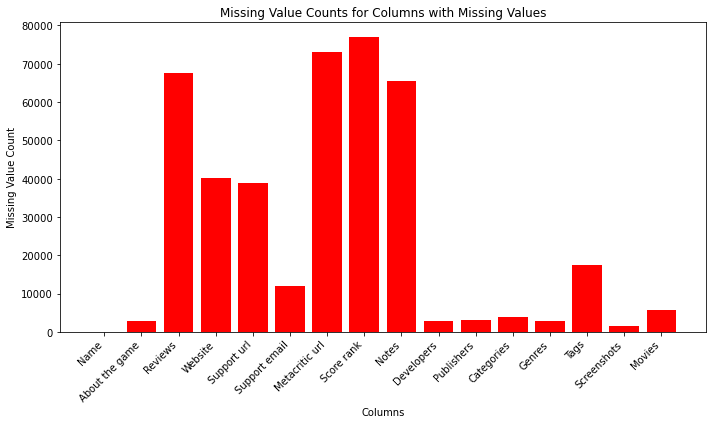

In [9]:
# Calculate the count of missing values in each column
missing_counts = df.isnull().sum()

# Filter columns with missing values
missing_columns = missing_counts[missing_counts > 0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for missing values
plt.bar(missing_columns.index, missing_columns.values, color='red')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Counts for Columns with Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


----

Do some normalizing

In [10]:
# Normalize column headers
df.columns = df.columns.str.lower()  # Convert to lowercase
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
df.columns = df.columns.str.replace('[^\w\s]', '')  # Remove special characters

print("Normalized column headers:")
print(df.columns)

Normalized column headers:
Index(['appid', 'name', 'release_date', 'estimated_owners', 'peak_ccu',
       'required_age', 'price', 'dlc_count', 'about_the_game',
       'supported_languages', 'full_audio_languages', 'reviews',
       'header_image', 'website', 'support_url', 'support_email', 'windows',
       'mac', 'linux', 'metacritic_score', 'metacritic_url', 'user_score',
       'positive', 'negative', 'score_rank', 'achievements', 'recommendations',
       'notes', 'average_playtime_forever', 'average_playtime_two_weeks',
       'median_playtime_forever', 'median_playtime_two_weeks', 'developers',
       'publishers', 'categories', 'genres', 'tags', 'screenshots', 'movies'],
      dtype='object')


/var/folders/yg/z64xf8615mxbsw25_zldzjnm0000gn/T/ipykernel_9059/773374837.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^\w\s]', '')  # Remove special characters


confertig to datetime

In [11]:
# Convert 'Release date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

print("DataFrame with 'Release date' in datetime format:")
display(df.head())

DataFrame with 'Release date' in datetime format:


,appid,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,about_the_game,supported_languages,full_audio_languages,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,user_score,positive,negative,score_rank,achievements,recommendations,notes,average_playtime_forever,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks,developers,publishers,categories,genres,tags,screenshots,movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


-----

Now some cleaning

In [12]:
# Delete rows where the values in the 'Name' column are missing
df_cleaned = df[df['name'].notnull()]
display(df_cleaned.head())

,appid,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,about_the_game,supported_languages,full_audio_languages,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,user_score,positive,negative,score_rank,achievements,recommendations,notes,average_playtime_forever,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks,developers,publishers,categories,genres,tags,screenshots,movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


before we go to SQL, we drop all non-essential columns. We mostly would drop all non-INTEGER values.

In [13]:
# Columns to drop
columns_to_drop = ['website', 
                    'support_url', 
                    'support_email',
                    'about_the_game',
                    'score_rank',
                    'notes',
                    'reviews',
                    'metacritic_url',
                    'developers', 
                    'publishers', 
                    'categories', 
                    'genres', 
                    'tags', 
                    'screenshots', 
                    'movies']

# Drop the specified columns
df_small = df_cleaned.drop(columns=columns_to_drop)


check again for missing values

In [14]:
# Check for missing values
missing_values_small = df_small.isnull()

# Count the number of missing values in each column
missing_counts_small = missing_values_small.sum()

print("Missing value counts for each column:")
display(missing_counts_small)

Missing value counts for each column:


appid                         0
name                          0
release_date                  0
estimated_owners              0
peak_ccu                      0
required_age                  0
price                         0
dlc_count                     0
supported_languages           0
full_audio_languages          0
header_image                  0
windows                       0
mac                           0
linux                         0
metacritic_score              0
user_score                    0
positive                      0
negative                      0
achievements                  0
recommendations               0
average_playtime_forever      0
average_playtime_two_weeks    0
median_playtime_forever       0
median_playtime_two_weeks     0
dtype: int64

In [15]:
display(df_small.head())    

,appid,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,supported_languages,full_audio_languages,header_image,windows,mac,linux,metacritic_score,user_score,positive,negative,achievements,recommendations,average_playtime_forever,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,['English'],[],https://cdn.akamai.steamstatic.com/steam/apps/...,True,False,False,0,0,6,11,30,0,0,0,0,0
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],https://cdn.akamai.steamstatic.com/steam/apps/...,True,True,False,0,0,53,5,12,0,0,0,0,0
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,"['English', 'Portuguese - Brazil']",[],https://cdn.akamai.steamstatic.com/steam/apps/...,True,False,False,0,0,0,0,0,0,0,0,0,0
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],https://cdn.akamai.steamstatic.com/steam/apps/...,True,True,True,0,0,3,0,0,0,0,0,0,0
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,"['English', 'Spanish - Spain']",[],https://cdn.akamai.steamstatic.com/steam/apps/...,True,True,False,0,0,50,8,17,0,0,0,0,0


----

Lets try to put that in a PostGres-SQL - Enviroment

In [16]:
# export the data frame to DBeaver

# call the schema created for this project
schema = 'public'

# give the table a unique name
table_name = 'sgd_workbook_small'

# export the table to sql
if engine!=None:
    try:
        df_small.to_sql(name=table_name,
                        con=engine,
                        if_exists='replace',
                        schema=schema, 
                        index=False,
                        chunksize=5000, 
                        method='multi')
        print(f"The {table_name} table was imported successfully.")
    
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The sgd_workbook_small table was imported successfully.


check the import

In [17]:
# Select the Data from PostGreDatabase

sql = f"""

SELECT *
FROM {schema}.{table_name} as sgd_workbook_small


""" 
# Take the SQL-Command and import all Data from the PostGreDatabase to the variable sgd_workbook_small 
sgd_w_s = get_dataframe(sql) 
display(sgd_w_s.head(3))

,appid,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,supported_languages,full_audio_languages,header_image,windows,mac,linux,metacritic_score,user_score,positive,negative,achievements,recommendations,average_playtime_forever,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,['English'],[],https://cdn.akamai.steamstatic.com/steam/apps/...,True,False,False,0,0,6,11,30,0,0,0,0,0
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],https://cdn.akamai.steamstatic.com/steam/apps/...,True,True,False,0,0,53,5,12,0,0,0,0,0
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,"['English', 'Portuguese - Brazil']",[],https://cdn.akamai.steamstatic.com/steam/apps/...,True,False,False,0,0,0,0,0,0,0,0,0,0


At this point, we loaded the file into Python, and with Python, we created a Table in SQL. With an external Program like DBeaver, we are now able to see and check the Data more easily, and can now think about our next steps.

We could now also take this Data-table to use it in Tableau, but maybe we want to delete a few rows first

-----

We see that the column "header_image" is also quite useless for further work

In [22]:
# We want to delete "header_image"
column_name = 'header_image'

sql_text = f"""

DO $$ 
BEGIN
    IF EXISTS (
        SELECT column_name
        FROM information_schema.columns
        WHERE table_schema = '{schema}'
        AND table_name = '{table_name}'
        AND column_name = '{column_name}'
    ) THEN
        EXECUTE 'ALTER TABLE ' || quote_ident('{schema}') || '.' || quote_ident('{table_name}')
        || ' DROP COLUMN ' || quote_ident('{column_name}');
    END IF;
END $$;


""" 
# Take the SQL-Command and import all Data from the PostGreDatabase to the variable sgd_workbook_small 
result = engine.execute(sql_text)

In [31]:
# Count of games with zero user score
sql = f"""
SELECT COUNT(*) AS count_of_games_with_zero_user_score
FROM {schema}.{table_name}
WHERE user_score = 0;
""" 
# Take the SQL-Command and import all Data from the PostGreDatabase to the variable sgd_workbook_small 
print(schema)
print(table_name)
sgd_w_s = get_dataframe(sql) 
display(sgd_w_s.head(3))

public
sgd_workbook_small


,count_of_games_with_zero_user_score
0,76943


In [26]:
# Count of rows in column "user score"
sql = f"""
SELECT COUNT(*) AS count_of_games_with_zero_user_score
FROM {schema}.{table_name}
WHERE User_Score IS NOT NULL;
""" 
# Take the SQL-Command and import all Data from the PostGreDatabase to the variable sgd_workbook_small 
sgd_w_s = get_dataframe(sql) 


,count_of_games_with_zero_user_score
0,76985


In [34]:
# Count of games with  user score > 0
sql = f"""
SELECT COUNT(*) AS count_of_games_with_zero_user_score
FROM {schema}.{table_name}
WHERE user_score > 0;
""" 
# Take the SQL-Command and import all Data from the PostGreDatabase to the variable sgd_workbook_small 
print(schema)
print(table_name)
sgd_w_s = get_dataframe(sql) 
display(sgd_w_s.head(3))

public
sgd_workbook_small


,count_of_games_with_zero_user_score
0,42


In [36]:
# Show all rows with "user score" > 0
sql = f"""
SELECT *
FROM sgd_workbook_small
WHERE User_Score > 0
ORDER BY User_Score DESC;
""" 
# Take the SQL-Command and import all Data from the PostGreDatabase to the variable sgd_workbook_small 
sgd_w_s = get_dataframe(sql) 
display(sgd_w_s)

,appid,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,supported_languages,full_audio_languages,windows,mac,linux,metacritic_score,user_score,positive,negative,achievements,recommendations,average_playtime_forever,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks
0,961640,The Tower of Five Hearts,2018-11-14,0 - 20000,0,18,14.99,0,['English'],[],True,True,True,0,100,16,0,0,0,0,0,0,0
1,1013180,Funbag Fantasy,2019-01-31,0 - 20000,7,18,44.99,0,['English'],[],True,False,False,0,100,21,0,0,127,0,0,0,0
2,935560,Hentai Strip Shot,2018-09-21,0 - 20000,0,0,1.19,1,['English'],[],True,True,True,0,100,26,0,100,0,49,0,49,0
3,471720,K Station,2016-06-15,0 - 20000,0,0,0.00,0,['English'],[],True,False,False,0,100,10,0,0,0,0,0,0,0
4,912190,Hentai IQ Puzzle,2018-09-08,0 - 20000,0,0,0.99,2,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,0,100,27,1,50,0,0,0,0,0
5,868980,DEEP SPACE WAIFU: NEKOMIMI,2018-12-18,0 - 20000,1,18,3.99,1,['English'],['English'],True,False,False,0,98,362,6,69,897,226,0,226,0
6,723090,Meltys Quest,2017-10-24,20000 - 50000,38,0,19.99,0,"['English', 'Japanese', 'Simplified Chinese', ...",[],True,True,True,0,97,446,10,38,1780,655,486,763,486
7,1004650,Unlock Me,2019-01-03,0 - 20000,0,0,3.99,0,"['English', 'French', 'German', 'Russian', 'Ja...",[],True,False,False,0,96,35,1,0,0,0,0,0,0
8,560000,Ladykiller in a Bind,2017-01-09,0 - 20000,5,18,19.99,1,['English'],[],True,True,True,73,95,170,8,20,157,356,0,414,0
9,639780,Deep Space Waifu: FLAT JUSTICE,2017-12-07,50000 - 100000,1,18,2.99,1,"['English', 'Japanese', 'Korean', 'Portuguese ...","['English', 'Traditional Chinese']",True,False,False,0,95,1449,67,69,1988,122,0,139,0


As you see, we only have 42 entries, that are not "0". We could also delete this column.

-----

We can now do the same, similar checks for other columns

In [37]:
# Count of games with recommendations = 0
sql = f"""
SELECT COUNT(*) AS count_of_games_with_recommendations
FROM {schema}.{table_name}
WHERE recommendations = 0;
""" 
# Take the SQL-Command and import all Data from the PostGreDatabase to the variable sgd_workbook_small 
print(schema)
print(table_name)
sgd_w_s = get_dataframe(sql) 
display(sgd_w_s.head(3))

public
sgd_workbook_small


,count_of_games_with_recommendations
0,63928


In [38]:
# Count of games with recommendations are not empty
sql = f"""
SELECT COUNT(*) AS count_of_games_with_recommendations
FROM {schema}.{table_name}
WHERE recommendations IS NOT NULL;
""" 
# Take the SQL-Command and import all Data from the PostGreDatabase to the variable sgd_workbook_small 
print(schema)
print(table_name)
sgd_w_s = get_dataframe(sql) 
display(sgd_w_s.head(3))

public
sgd_workbook_small


,count_of_games_with_recommendations
0,76985


In [39]:
# Count of games with recommendations > 0
sql = f"""
SELECT COUNT(*) AS count_of_games_with_recommendations
FROM {schema}.{table_name}
WHERE recommendations > 0;
""" 
# Take the SQL-Command and import all Data from the PostGreDatabase to the variable sgd_workbook_small 
print(schema)
print(table_name)
sgd_w_s = get_dataframe(sql) 
display(sgd_w_s.head(3))

public
sgd_workbook_small


,count_of_games_with_recommendations
0,13057


-----

In [58]:
# Read your DataFrame from your source (replace with your actual data)
# df = pd.read_csv('your_data.csv')

for column_name in df_small.columns:
    count_zero = (df_small[column_name] == 0).sum()
    count_not_null = df_small[column_name].notnull().sum()
    
    if pd.api.types.is_numeric_dtype(df_small[column_name]):
        count_greater_than_zero = (df_small[column_name] > 0).sum()
    else:
        count_greater_than_zero = "N/A"
    
    print(f"Column: {column_name}")
    display(f"Columns has rows of Not Null: {count_not_null}, How often is Greater Than Zero: {count_greater_than_zero}, How often is Zero: {count_zero}")
    print("=" * 40)


Column: appid


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 76985, How often is Zero: 0'

Column: name


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: N/A, How often is Zero: 0'

Column: release_date


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: N/A, How often is Zero: 0'

Column: estimated_owners


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: N/A, How often is Zero: 0'

Column: peak_ccu


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 20926, How often is Zero: 56059'

Column: required_age


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 1561, How often is Zero: 75424'

Column: price


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 63299, How often is Zero: 13686'

Column: dlc_count


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 11259, How often is Zero: 65726'

Column: supported_languages


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: N/A, How often is Zero: 0'

Column: full_audio_languages


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: N/A, How often is Zero: 0'

Column: header_image


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: N/A, How often is Zero: 0'

Column: windows


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 76958, How often is Zero: 27'

Column: mac


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 15156, How often is Zero: 61829'

Column: linux


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 10420, How often is Zero: 66565'

Column: metacritic_score


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 3792, How often is Zero: 73193'

Column: user_score


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 42, How often is Zero: 76943'

Column: positive


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 57539, How often is Zero: 19446'

Column: negative


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 48275, How often is Zero: 28710'

Column: achievements


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 38194, How often is Zero: 38791'

Column: recommendations


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 13057, How often is Zero: 63928'

Column: average_playtime_forever


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 14450, How often is Zero: 62535'

Column: average_playtime_two_weeks


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 1936, How often is Zero: 75049'

Column: median_playtime_forever


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 14450, How often is Zero: 62535'

Column: median_playtime_two_weeks


'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 1936, How often is Zero: 75049'

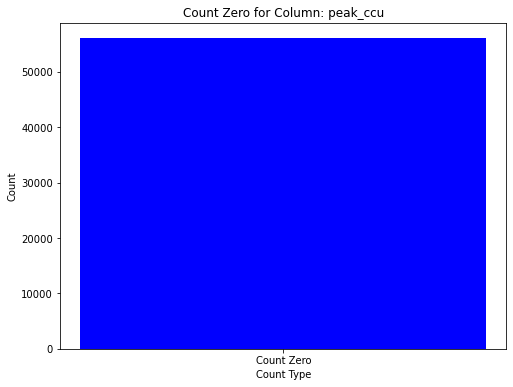

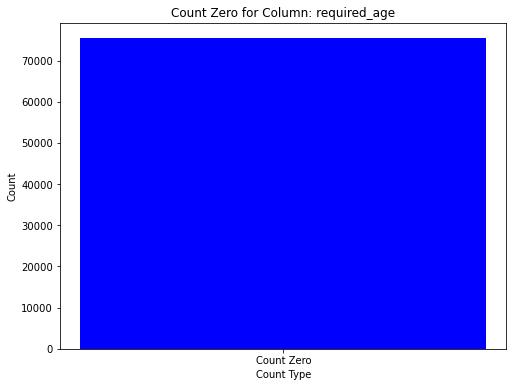

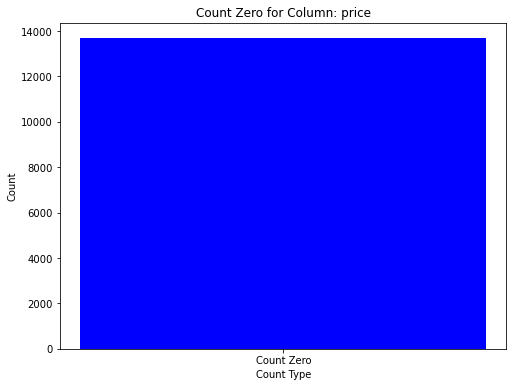

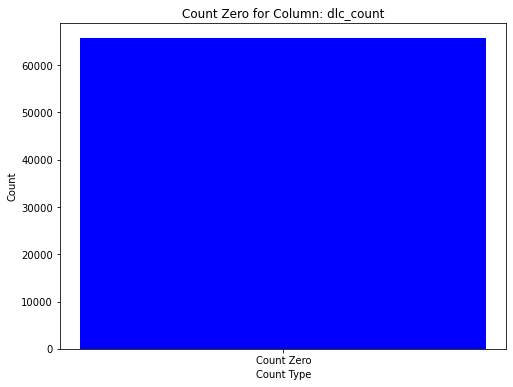

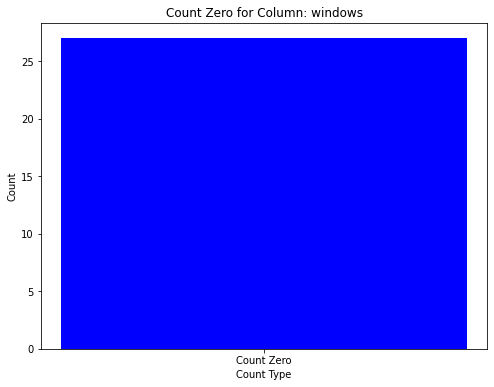

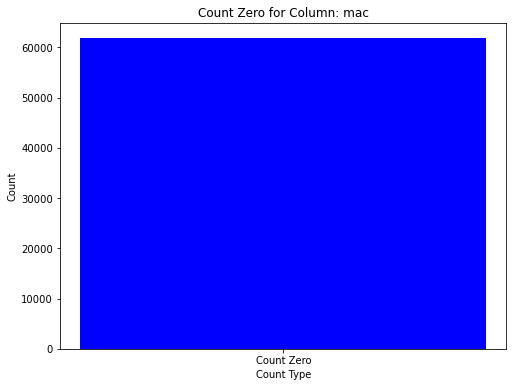

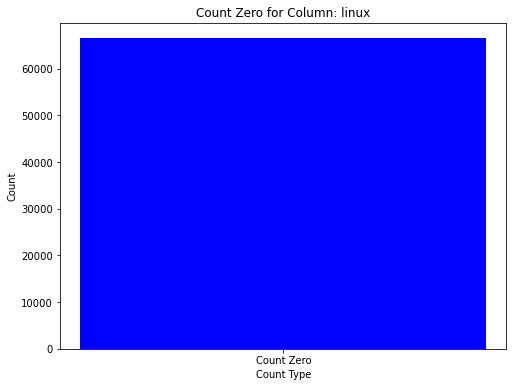

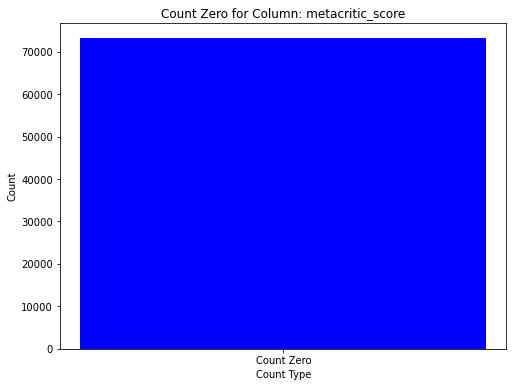

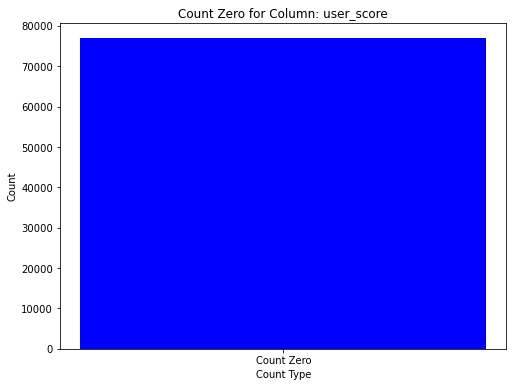

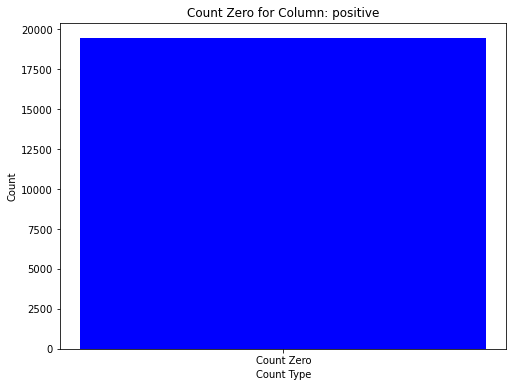

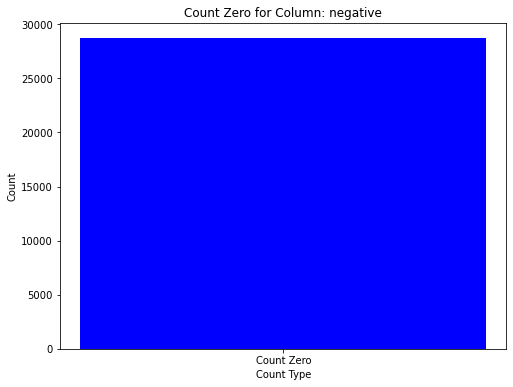

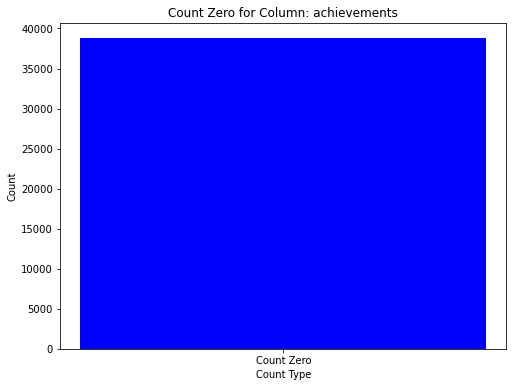

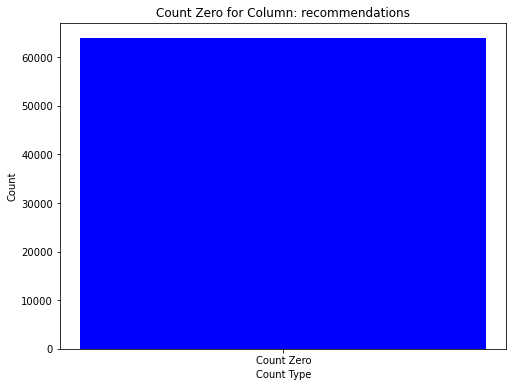

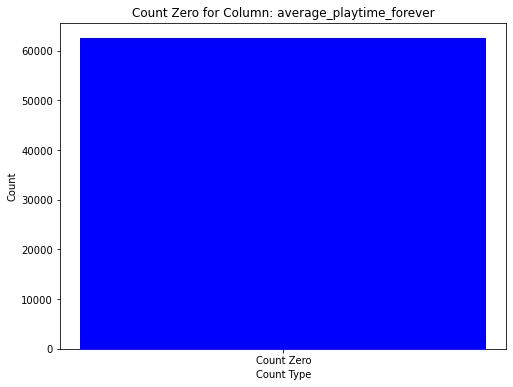

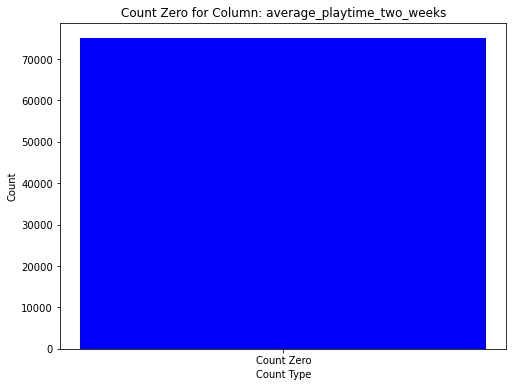

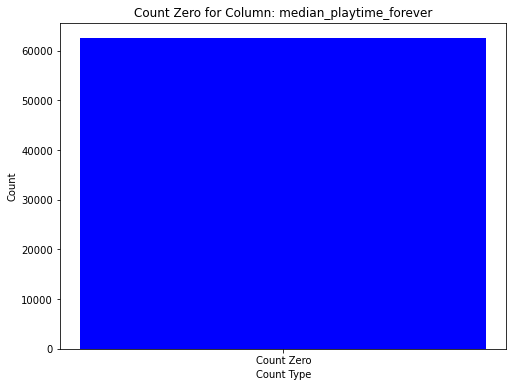

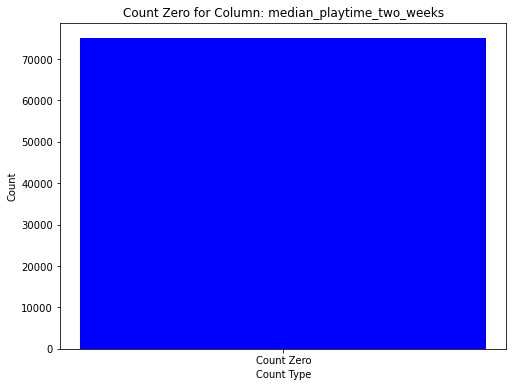

In [60]:
for column_name in df_small.columns:
    count_zero = (df_small[column_name] == 0).sum()
    
    if count_zero > 0:
        plt.figure(figsize=(8, 6))
        plt.bar(['Count Zero'], [count_zero], color='blue')
        plt.title(f'Count Zero for Column: {column_name}')
        plt.xlabel('Count Type')
        plt.ylabel('Count')
        plt.show()

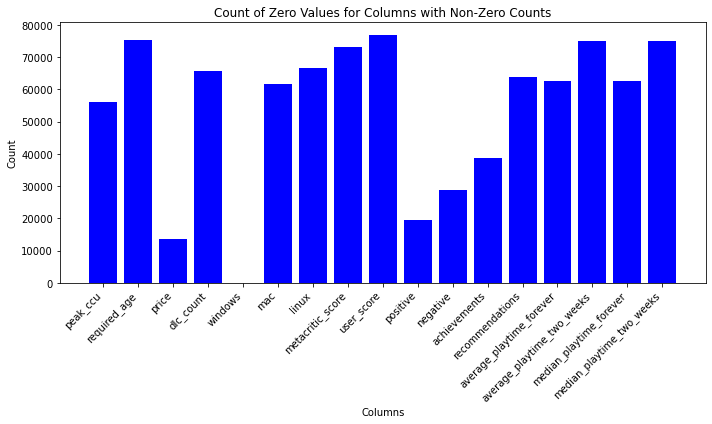

In [61]:


# Read your DataFrame from your source (replace with your actual data)
# df = pd.read_csv('your_data.csv')

count_data = []

for column_name in df_small.columns:
    count_zero = (df_small[column_name] == 0).sum()
    
    if count_zero > 0:
        count_data.append((column_name, count_zero))

if count_data:
    column_names, counts = zip(*count_data)
    plt.figure(figsize=(10, 6))
    plt.bar(column_names, counts, color='blue')
    plt.title('Count of Zero Values for Columns with Non-Zero Counts')
    plt.xlabel('Columns')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No columns with non-zero count of zero values found.")
